## We  consider the problem of sentiment analysis as multiclass, we shoud keep in mind the imbalance of the dataset as well

In [7]:
#importing necessary libaries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from sklearn.model_selection import train_test_split


%matplotlib inline 


In [8]:
print(xgb.__version__)


2.0.3


In [9]:
df=pd.read_csv("supply_chain_text_prep_06_06.csv", sep=',')
df.head()

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber,Sentiment,Review length,Word count,emoji
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,feel lucky found used phone us used hard phone...,1.0,3.702703,37,Positive,374,72,[]
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,3.702703,37,Positive,214,40,[]
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,pleased,0.0,3.702703,37,Positive,12,2,[]
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,works good goes slow sometimes good phone love,0.0,3.702703,37,Positive,76,17,[]
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,great phone replace lost phone thing volume bu...,0.0,3.702703,37,Positive,223,43,[]


In [10]:
df.isna().sum()

Product Name        0
Brand Name          0
Price            4974
Stars               0
Text              745
Review Votes        0
AverageRating       0
ReviewsNumber       0
Sentiment           0
Review length       0
Word count          0
emoji               0
dtype: int64

In [11]:
#we have some NaNs 
df.dropna(subset = ['Text'], inplace=True)


#and I removed them

# Decision Tree with CountVectorized Object

In [12]:
#split the dataset for the training and testing set
#the text were vectorized with Count Vectorizer 

X, y = np.asarray(df.Text), np.asarray(df.Sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)


vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

In [7]:
#instanciation
decision_tree = DecisionTreeClassifier()

#training the model
decision_tree.fit(X_train_vectorized, y_train)

#prediction
y_pred_decision_tree = decision_tree.predict(X_test_vectorized)




#Classification report for Decision Tree
print("Classification report of Decision Tree:\n", classification_report(y_pred_decision_tree, y_test))

#Confusion Matrix for DecisionTree
confusion_matrix = pd.crosstab(y_test, y_pred_decision_tree, rownames =["Real sentiment"], colnames=["Predicted sentiment"])
print("Confusion matrix of decision tree:\n")
confusion_matrix

#the neutral column is hard to predict and is doing really bad!

Classification report of Decision Tree:
               precision    recall  f1-score   support

    Negative       0.85      0.86      0.85     19388
     Neutral       0.59      0.69      0.64      5403
    Positive       0.95      0.93      0.94     56723

    accuracy                           0.90     81514
   macro avg       0.80      0.83      0.81     81514
weighted avg       0.90      0.90      0.90     81514

Confusion matrix of decision tree:



Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,16594,693,2144
Neutral,943,3731,1636
Positive,1851,979,52943


In [11]:
y_train_dt=decision_tree.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_dt)
print ('The accuracy of decision tree for training set:', accuracy_train)
y_test_dt=decision_tree.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_dt)
print('The accuracy of decision tree for test set:', accuracy_test)

The accuracy of decision tree for training set: 0.9912366075079742
The accuracy of decision tree for test set: 0.8988394631597026


# Gradient Boosting

In [62]:

#instanciation
gradient_boosting = GradientBoostingClassifier()

#training the model
gradient_boosting.fit(X_train_vectorized, y_train)

#prediction
y_pred_gradient_boosting = gradient_boosting.predict(X_test_vectorized)

#Classification report for GradientBoosting
print("Classification report of Gradient boosting:\n", classification_report(y_pred_gradient_boosting, y_test))

#Confusion Matrix for GradientBoosting
confusion_matrix = pd.crosstab(y_test, y_pred_gradient_boosting, rownames =["Real sentiment"], colnames=["Predicted sentiment"])
print("Confusion matrix of gradient boosting:\n")
confusion_matrix

Classification report of Gradient boosting:
               precision    recall  f1-score   support

    Negative       0.49      0.82      0.61     11624
     Neutral       0.02      0.56      0.04       254
    Positive       0.98      0.78      0.87     69636

    accuracy                           0.79     81514
   macro avg       0.50      0.72      0.51     81514
weighted avg       0.91      0.79      0.83     81514

Confusion matrix of gradient boosting:



Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,9492,60,10002
Neutral,1091,143,5152
Positive,1041,51,54482


In [63]:
y_train_gradient_boosting=gradient_boosting.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_gradient_boosting)
print ('The accuracy of gradient boosting for training set:', accuracy_train)
y_test_gradient_boosting=gradient_boosting.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_gradient_boosting)
print('The accuracy of gradient boosting for the test set:', accuracy_test)
#most of neutral sentiments recognised as positive, have of negative recognised as positive


The accuracy of gradient boosting for training set: 0.7887625746299174
The accuracy of gradient boosting for the test set: 0.7865765389994357


# Gradient Boosting and Decision Tree with RandomOver Sampler

Sample Classes oversampled : {'Positive': 167155, 'Negative': 167155, 'Neutral': 167155}
Classification report of Decision Tree with Resampling:
                    pre       rec       spe        f1       geo       iba       sup

   Negative       0.84      0.85      0.95      0.84      0.90      0.80     19501
    Neutral       0.65      0.54      0.97      0.59      0.72      0.50      7754
   Positive       0.92      0.94      0.84      0.93      0.89      0.80     54259

avg / total       0.88      0.88      0.88      0.88      0.87      0.77     81514

Classification report of Gradient Boosting with Resampling:
                    pre       rec       spe        f1       geo       iba       sup

   Negative       0.79      0.58      0.93      0.67      0.73      0.52     26676
    Neutral       0.49      0.18      0.95      0.26      0.41      0.15     17684
   Positive       0.63      0.95      0.54      0.76      0.71      0.53     37154

avg / total       0.65      0.66      0.7

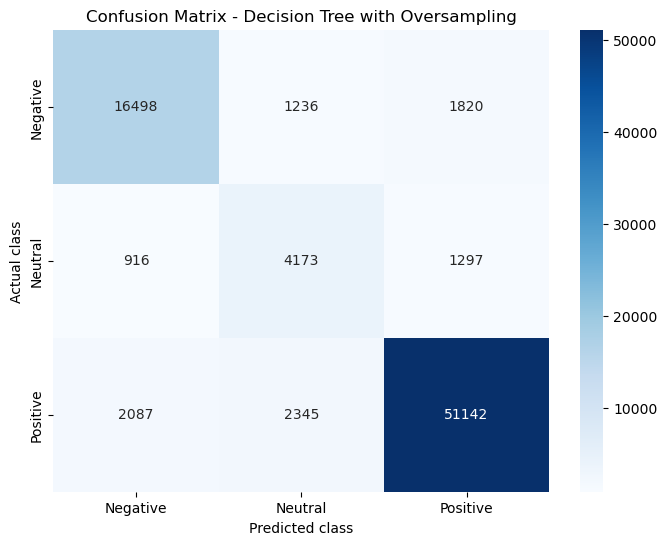

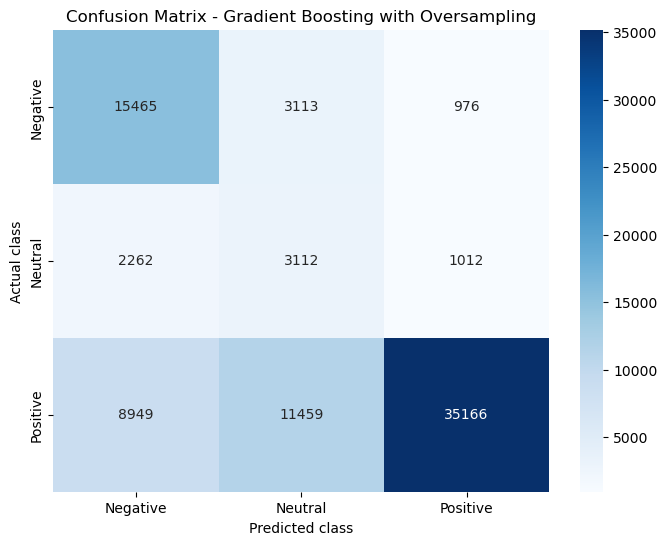

In [64]:

# Define the models
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()

# Define the samplers
ros = RandomOverSampler(sampling_strategy='auto', random_state=242)


# Apply over- and under sampling separately
X_ro, y_ro = ros.fit_resample(X_train_vectorized, y_train)
print('Sample Classes oversampled :', dict(pd.Series(y_ro).value_counts()))

# Fit the models with resampled data
decision_tree.fit(X_ro, y_ro)
gradient_boosting.fit(X_ro, y_ro)

# Predictions
y_pred_decision_tree_resampled = decision_tree.predict(X_test_vectorized)
y_pred_gradient_boosting_resampled = gradient_boosting.predict(X_test_vectorized)

# Evaluation of the oversampled models
print("Classification report of Decision Tree with Resampling:\n",
      classification_report_imbalanced(y_pred_decision_tree_resampled, y_test))
print("Classification report of Gradient Boosting with Resampling:\n",
      classification_report_imbalanced(y_pred_gradient_boosting_resampled, y_test))

# Confusion Matrix for DecisionTree with Oversampling
confusion_matrix_decision_tree_oversampled = pd.crosstab(y_test, y_pred_decision_tree_resampled,
                                                       rownames=["Actual class"], colnames=["Predicted class"])
print("Confusion matrix of Decision Tree with Resampling:\n", 
      confusion_matrix_decision_tree_oversampled)

# Confusion Matrix for GradientBoosting with Oversampling
confusion_matrix_gradient_boosting_oversampled = pd.crosstab(y_test, y_pred_gradient_boosting_resampled,
                                                           rownames=["Actual class"], colnames=["Predicted class"])
print("Confusion matrix of Gradient Boosting with Resampling:\n", 
      confusion_matrix_gradient_boosting_oversampled)



# Plot the heatmap for DecisionTree with Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_decision_tree_oversampled, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree with Oversampling")
plt.show()

# Plot the heatmap for GradientBoosting with Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_gradient_boosting_oversampled, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting with Oversampling")
plt.show()

In [66]:
y_train_gradient_boosting=gradient_boosting.predict(X_ro)
accuracy_train_gb = accuracy_score(y_ro, y_train_gradient_boosting)
print ('The accuracy of gradient boosting for training set:', accuracy_train_gb)
y_test_gradient_boosting=gradient_boosting.predict(X_test_vectorized)
accuracy_test_gb = accuracy_score(y_test, y_test_gradient_boosting)
print('The accuracy of gradient boosting for the test set:', accuracy_test_gb)

y_train_dt=decision_tree.predict(X_ro)
accuracy_train_dt = accuracy_score(y_ro, y_train_dt)
print ('The accuracy of decision tree for training set:', accuracy_train_dt)
y_test_dt=decision_tree.predict(X_test_vectorized)
accuracy_test_dt = accuracy_score(y_test, y_test_dt)
print('The accuracy of decision tree for test set:', accuracy_test_dt)


The accuracy of gradient boosting for training set: 0.6425373655190293
The accuracy of gradient boosting for the test set: 0.6593100571680939
The accuracy of decision tree for training set: 0.9794183043682012
The accuracy of decision tree for test set: 0.8809897686287018


# The same with random under sampling

In [67]:
# Define the models
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()

# Define the samplers
rus = RandomUnderSampler(sampling_strategy='auto', random_state=242)


# Apply over- and under sampling separately
X_ru, y_ru = ros.fit_resample(X_train_vectorized, y_train)
print('Sample Classes undersampled :', dict(pd.Series(y_ru).value_counts()))

# Fit the models with resampled data
decision_tree.fit(X_ru, y_ru)
gradient_boosting.fit(X_ru, y_ru)

# Predictions
y_pred_decision_tree_resampled = decision_tree.predict(X_test_vectorized)
y_pred_gradient_boosting_resampled = gradient_boosting.predict(X_test_vectorized)

# Evaluation of the oversampled models
print("Classification report of Decision Tree with Resampling:\n",
      classification_report_imbalanced(y_pred_decision_tree_resampled, y_test))
print("Classification report of Gradient Boosting with Resampling:\n",
      classification_report_imbalanced(y_pred_gradient_boosting_resampled, y_test))

# Confusion Matrix for DecisionTree with Oversampling
confusion_matrix_decision_tree_oversampled = pd.crosstab(y_test, y_pred_decision_tree_resampled,
                                                       rownames=["Actual class"], colnames=["Predicted class"])
print("Confusion matrix of Decision Tree with Resampling:\n", 
      confusion_matrix_decision_tree_oversampled)

# Confusion Matrix for GradientBoosting with Oversampling
confusion_matrix_gradient_boosting_oversampled = pd.crosstab(y_test, y_pred_gradient_boosting_resampled,
                                                           rownames=["Actual class"], colnames=["Predicted class"])
print("Confusion matrix of Gradient Boosting with Resampling:\n", 
      confusion_matrix_gradient_boosting_oversampled)




Sample Classes undersampled : {'Positive': 167155, 'Negative': 167155, 'Neutral': 167155}
Classification report of Decision Tree with Resampling:
                    pre       rec       spe        f1       geo       iba       sup

   Negative       0.84      0.85      0.95      0.85      0.90      0.80     19536
    Neutral       0.65      0.54      0.97      0.59      0.72      0.50      7717
   Positive       0.92      0.94      0.84      0.93      0.89      0.80     54261

avg / total       0.88      0.88      0.88      0.88      0.87      0.77     81514

Classification report of Gradient Boosting with Resampling:
                    pre       rec       spe        f1       geo       iba       sup

   Negative       0.79      0.58      0.93      0.67      0.73      0.52     26678
    Neutral       0.49      0.18      0.95      0.26      0.41      0.15     17682
   Positive       0.63      0.95      0.54      0.76      0.71      0.53     37154

avg / total       0.65      0.66      0.

In [68]:
y_train_gradient_boosting=gradient_boosting.predict(X_ru)
accuracy_train_gb = accuracy_score(y_ru, y_train_gradient_boosting)
print ('The accuracy of gradient boosting for training set:', accuracy_train_gb)
y_test_gradient_boosting=gradient_boosting.predict(X_test_vectorized)
accuracy_test_gb = accuracy_score(y_test, y_test_gradient_boosting)
print('The accuracy of gradient boosting for the test set:', accuracy_test_gb)

y_train_dt=decision_tree.predict(X_ru)
accuracy_train_dt = accuracy_score(y_ru, y_train_dt)
print ('The accuracy of decision tree for training set:', accuracy_train_dt)
y_test_dt=decision_tree.predict(X_test_vectorized)
accuracy_test_dt = accuracy_score(y_test, y_test_dt)
print('The accuracy of decision tree for test set:', accuracy_test_dt)


The accuracy of gradient boosting for training set: 0.6425373655190293
The accuracy of gradient boosting for the test set: 0.6593223249993866
The accuracy of decision tree for training set: 0.9794183043682012
The accuracy of decision tree for test set: 0.8805849301960399


# Logistic Regression

In [14]:
#instantiation
lr = LogisticRegression(max_iter=1000)

#fitting the training set
lr.fit(X_train_vectorized, y_train)
y_pred = lr.predict(X_test_vectorized)

#Evaluation with confusion matrix
cm_lr = pd.crosstab(y_test, y_pred, rownames=['Real sentiment'], colnames=['Predicted sentiment'])
display(cm_lr)

#Evaluation with classification report
print("Classificationreport of the Logistic Regression:\n",classification_report(y_test, y_pred))

Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,16429,467,2535
Neutral,1556,2003,2751
Positive,1307,583,53883


Classificationreport of the Logistic Regression:
               precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     19431
     Neutral       0.66      0.32      0.43      6310
    Positive       0.91      0.97      0.94     55773

    accuracy                           0.89     81514
   macro avg       0.81      0.71      0.74     81514
weighted avg       0.88      0.89      0.88     81514



In [15]:
y_train_log_reg=lr.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_log_reg)
print('The accuracy of logistic regression for training set :', accuracy_train)
y_test_log_reg=lr.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_log_reg)
print('The accuracy of logistic regression for test set:', accuracy_test)

The accuracy of logistic regression for training set : 0.9188026498732313
The accuracy of logistic regression for test set: 0.8871482199376794


# Support Vector machines (with Grid Search)

In [ ]:
# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              #'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
              'kernel': ['poly']}

# Instantiate SVM
svc = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_vectorized, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test_vectorized)

# Evaluation with confusion matrix
cm_svc = pd.crosstab(y_test, y_pred, rownames=['Real sentiment'], colnames=['Predicted sentiment'])
display(cm_svc)

# Evaluation with classification report
print("Classification report of the SVM:\n", classification_report(y_test, y_pred))

In [ ]:
y_train_svc=best_svc.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_svc)
y_test_svc=best_svc.predict(X_test_vectorized)
accuracy_test= accuracy_score(y_test, y_test_svc)
print('The accuracy of SVM , tuned, is:', accuracy_train)
print('The accuracy of test SVM, tuned, is:', accuracy_test)

# Random Forest

In [16]:
#instantiation
rf = ensemble.RandomForestClassifier(n_jobs=-1)

#fitting the training set
rf.fit(X_train_vectorized, y_train)
y_pred = rf.predict(X_test_vectorized)

#Evaluation with confusion matrix
cm_rf = pd.crosstab(y_test, y_pred, rownames=['Real sentiment'], colnames=['Predicted sentiment'])
display(cm_rf)

#Evaluation with classification report
print("Classification report of the Random Forest:\n", classification_report(y_test, y_pred))

Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,17495,71,1865
Neutral,859,3424,2027
Positive,887,67,54819


Classification report of the Random Forest:
               precision    recall  f1-score   support

    Negative       0.91      0.90      0.90     19431
     Neutral       0.96      0.54      0.69      6310
    Positive       0.93      0.98      0.96     55773

    accuracy                           0.93     81514
   macro avg       0.93      0.81      0.85     81514
weighted avg       0.93      0.93      0.92     81514



In [18]:
y_train_rf=rf.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_rf)
print('The accuracy of training random forest model:',accuracy_train)
y_test_rf=rf.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_rf)
print ('The accuracy of test randon forest model:', accuracy_test)

The accuracy of training random forest model: 0.9912366075079742
The accuracy of test randon forest model: 0.9291410064528792


In [19]:
#Case test prediction with Random Forest:

user_review = ("EIt works fine. The battery is good, and the performance is great. The cameras are good, and the display looks great. However, Samsung still has not fixed the issue with screen burn-in. So, I can't use apps like TikTok or Instagram for too long, as the screen easily burns in, and you start seeing ghost images on the screen. This issue is related to all OLED and AMOLED displays.")



# Transform user input using the pre-trained CountVectorizer
user_input_transformed = vectorizer.transform([user_review])

# Make prediction using the RandomForestClassifier model
test_prediction = rf.predict(user_input_transformed)

# Display the result
print("Sentiment Prediction:")
print(test_prediction[0])


Sentiment Prediction:
Positive


# Random Forest with Random Overasampling

In [14]:
# Define the samplers
ros = RandomOverSampler(sampling_strategy='auto', random_state=242)


# Apply over sampling separately
X_ro, y_ro = ros.fit_resample(X_train_vectorized, y_train)
print('Sample Classes oversampled :', dict(pd.Series(y_ro).value_counts()))


rf = ensemble.RandomForestClassifier(n_jobs=-1)
rf.fit(X_ro, y_ro)
y_pred_rf_resampled = rf.predict(X_test_vectorized)

# Evaluation of the oversampled models
print("Classification report of Random Forest model with Resampling:\n",
      classification_report_imbalanced(y_pred_rf_resampled, y_test))

confusion_matrix_rf_oversampled = pd.crosstab(y_test, y_pred_rf_resampled,
                                                           rownames=["Actual class"], colnames=["Predicted class"])
print("Confusion matrix of Random Forest with Resampling:\n", 
      confusion_matrix_rf_oversampled)


Sample Classes oversampled : {'Positive': 167061, 'Negative': 167061, 'Neutral': 167061}
Classification report of Random Forest model with Resampling:
                    pre       rec       spe        f1       geo       iba       sup

   Negative       0.91      0.89      0.97      0.90      0.93      0.86     19860
    Neutral       0.58      0.78      0.97      0.66      0.87      0.74      4684
   Positive       0.97      0.94      0.92      0.95      0.93      0.87     56970

avg / total       0.93      0.92      0.94      0.92      0.93      0.86     81514

Confusion matrix of Random Forest with Resampling:
 Predicted class  Negative  Neutral  Positive
Actual class                                
Negative            17742      251      1523
Neutral               991     3654      1685
Positive             1127      779     53762


In [15]:
y_train_rf=rf.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_rf)
print('The accuracy of training random forest model:',accuracy_train)
y_test_rf=rf.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_rf)
print ('The accuracy of test randon forest model:', accuracy_test)

#As we see it did not improve the result for the random forest model

The accuracy of training random forest model: 0.9862926310624028
The accuracy of test randon forest model: 0.9220256643030645


# Random Forest with Class Weights

In [17]:
rf = ensemble.RandomForestClassifier(n_jobs=-1, class_weight ={'Positive':1, 'Negative':5, 'Neutral':20})

rf.fit(X_train_vectorized, y_train)
y_pred = rf.predict(X_test_vectorized)

#Evaluation with confusion matrix
cm_rf = pd.crosstab(y_test, y_pred, rownames=['Real sentiment'], colnames=['Predicted sentiment'])
display(cm_rf)

#Evaluation with classification report
print("Classification report of the Random Forest:\n", classification_report(y_test, y_pred))
y_train_rf=rf.predict(X_train_vectorized)
accuracy_train = accuracy_score(y_train, y_train_rf)
print('The accuracy of training random forest model:',accuracy_train)
y_test_rf=rf.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_test_rf)
print ('The accuracy of test randon forest model:', accuracy_test)


Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,17276,296,1944
Neutral,804,3746,1780
Positive,812,2577,52279


Classification report of the Random Forest:
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90     19516
     Neutral       0.57      0.59      0.58      6330
    Positive       0.93      0.94      0.94     55668

    accuracy                           0.90     81514
   macro avg       0.80      0.81      0.80     81514
weighted avg       0.90      0.90      0.90     81514

The accuracy of training random forest model: 0.9641122106812792
The accuracy of test randon forest model: 0.8992443015923645


# Random Forest with TFIDF vectorized text

In [20]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Sentiment, test_size=0.2, random_state=1000)

tfidf_vect = TfidfVectorizer(max_features=2000)
tfidf_vect_fit=tfidf_vect.fit(X_train)
X_train=vectorize(X_train,tfidf_vect_fit)

In [26]:
#rf = ensemble.RandomForestClassifier()
#scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)
#print(scores)
#scores.mean()

[0.91726888 0.91945408 0.92119841 0.91799571 0.91981675]


0.9191467646013998

In [27]:

rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [28]:
X_test=vectorize(X_test,tfidf_vect_fit)

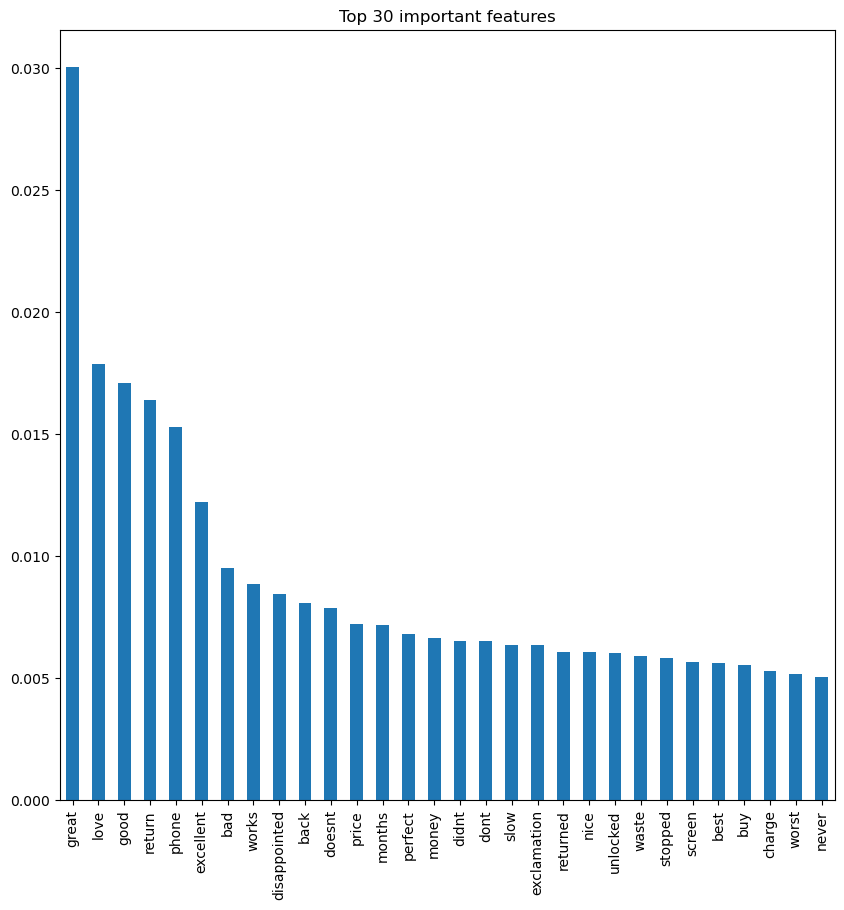

In [29]:

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='bar',figsize=(10,10))
plt.title("Top 30 important features")
plt.show()



## we can see some features are very imporant, as great, love, good, return, we can try to work with this later on, in other notebooks

In [35]:
#Evaluation with confusion matrix
y_pred = rf.predict(X_test)
cm_rf = pd.crosstab(y_test, y_pred, rownames=['Real sentiment'], colnames=['Predicted sentiment'])
display(cm_rf)

#Evaluation with classification report
print("Classification report of the Random Forest:\n", classification_report(y_test, y_pred))

Predicted sentiment,Negative,Neutral,Positive
Real sentiment,,,
Negative,13992,44,1513
Neutral,831,2657,1477
Positive,820,48,43829


Classification report of the Random Forest:
               precision    recall  f1-score   support

    Negative       0.89      0.90      0.90     15549
     Neutral       0.97      0.54      0.69      4965
    Positive       0.94      0.98      0.96     44697

    accuracy                           0.93     65211
   macro avg       0.93      0.81      0.85     65211
weighted avg       0.93      0.93      0.92     65211



In [31]:
y_train_rf=rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_rf)
print('The accuracy of training random forest model:',accuracy_train)
y_test_rf=rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_rf)
print ('The accuracy of test randon forest model:', accuracy_test)

The accuracy of training random forest model: 0.9866663088524514
The accuracy of test randon forest model: 0.9274202205149438


# XGBoost model

In [37]:
#replace the values of df.sentiment to integers
#this was the requirement of XGBoost and CNN

df.Sentiment = df.Sentiment.replace(['Positive','Negative','Neutral'],[2,0,1])

In [38]:
#XGBoost with Count Vectorizer
vectorizer = CountVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(df['Text'])
data_features = data_features.toarray()

X_train, X_test, y_train, y_test = train_test_split(data_features, df.Sentiment, test_size=0.2, random_state=42)

In [39]:
model = xgb.XGBClassifier(max_depth=10, n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix of XGBoost:\n")
pd.crosstab(y_test, y_pred,rownames=["Real sentiment"], colnames=["Predicted sentiment"])

              precision    recall  f1-score   support

           0       0.82      0.71      0.76     15528
           1       0.83      0.12      0.20      5017
           2       0.85      0.97      0.91     44666

    accuracy                           0.84     65211
   macro avg       0.83      0.60      0.62     65211
weighted avg       0.84      0.84      0.82     65211

Confusion matrix of XGBoost:



Predicted sentiment,0,1,2
Real sentiment,,,
0,11066,55,4407
1,1244,585,3188
2,1183,65,43418


In [41]:
y_train_xgb=model.predict(X_train)
accuracy_train=accuracy_score(y_train,y_train_xgb)
print('The accuracy of XGBoost model for train test:',accuracy_train)
y_test_xgb=model.predict(X_test)
accuracy_test=accuracy_score(y_test, y_test_xgb)
print('The accuracy of XGBoost model for test set:', accuracy_test)

The accuracy of XGBoost model for train test: 0.8570749454652798
The accuracy of XGBoost model for test set: 0.8444740917943292


In [42]:
#For TFIDF vectorizer
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Sentiment, test_size=0.2, random_state=1000)
tfidf_vect = TfidfVectorizer(max_features=2000)
tfidf_vect_fit=tfidf_vect.fit(X_train)
X_train=vectorize(X_train,tfidf_vect_fit)
X_test=vectorize(X_test,tfidf_vect_fit)

In [45]:
model = xgb.XGBClassifier(max_depth=10, n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix of XGBoost:\n")
pd.crosstab(y_test, y_pred,rownames=["Real sentiment"], colnames=["Predicted sentiment"])

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     15549
           1       0.84      0.10      0.18      4965
           2       0.86      0.97      0.91     44697

    accuracy                           0.85     65211
   macro avg       0.84      0.60      0.62     65211
weighted avg       0.85      0.85      0.82     65211

Confusion matrix of XGBoost:



Predicted sentiment,0,1,2
Real sentiment,,,
0,11370,57,4122
1,1379,495,3091
2,1226,40,43431


In [47]:
y_train_xgb=model.predict(X_train)
accuracy_train=accuracy_score(y_train,y_train_xgb)
print('The accuracy of XGBoost model for train test:',accuracy_train)
y_test_xgb=model.predict(X_test)
accuracy_test=accuracy_score(y_test, y_test_xgb)
print('The accuracy of XGBoost model for test set:', accuracy_test)

The accuracy of XGBoost model for train test: 0.8610620181488482
The accuracy of XGBoost model for test set: 0.8479550995997608


## The best model for the sentiment analysis was the Random Forest with Count/Tfidf Vectorizer